In [14]:
import numpy as np
import tensorflow as tf

import json
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import regularizers

import cassiopeia as cass

from sklearn.model_selection import train_test_split


In [2]:
matches = json.loads(open("matches.dat", "r").read())
print(len(matches))

9086


In [3]:
# because riot randomly (????) assigns their keys to champions (????????)

keyid = {}
for match in matches:
    for c in match["blueteam"]:
        if(c not in keyid):
            keyid[c] = len(keyid.keys())
    for c in match["redteam"]:
        if(c not in keyid):
            keyid[c] = len(keyid.keys())

print(keyid)

{15: 0, 41: 1, 43: 2, 222: 3, 238: 4, 268: 5, 68: 6, 29: 7, 163: 8, 81: 9, 112: 10, 117: 11, 119: 12, 164: 13, 26: 14, 61: 15, 245: 16, 98: 17, 126: 18, 24: 19, 518: 20, 101: 21, 11: 22, 76: 23, 79: 24, 30: 25, 50: 26, 145: 27, 20: 28, 21: 29, 54: 30, 22: 31, 8: 32, 51: 33, 32: 34, 3: 35, 498: 36, 122: 37, 45: 38, 67: 39, 102: 40, 114: 41, 4: 42, 48: 43, 202: 44, 25: 45, 111: 46, 412: 47, 63: 48, 23: 49, 427: 50, 235: 51, 57: 52, 127: 53, 60: 54, 875: 55, 19: 56, 103: 57, 432: 58, 44: 59, 420: 60, 517: 61, 350: 62, 7: 63, 10: 64, 31: 65, 14: 66, 40: 67, 516: 68, 154: 69, 104: 70, 203: 71, 89: 72, 53: 73, 131: 74, 74: 75, 55: 76, 1: 77, 429: 78, 34: 79, 13: 80, 99: 81, 90: 82, 110: 83, 85: 84, 17: 85, 91: 86, 80: 87, 136: 88, 39: 89, 18: 90, 254: 91, 72: 92, 555: 93, 2: 94, 161: 95, 16: 96, 96: 97, 223: 98, 134: 99, 92: 100, 84: 101, 113: 102, 35: 103, 9: 104, 497: 105, 266: 106, 267: 107, 142: 108, 36: 109, 133: 110, 201: 111, 78: 112, 157: 113, 59: 114, 246: 115, 37: 116, 121: 117, 12

In [4]:
def get_x_from_teams(blueteam, redteam):
    xtemp = []
    for c in blueteam:
        xtemp.append(tf.keras.utils.to_categorical(keyid[c], num_classes=149))
    
    for c in redteam:
        xtemp.append(tf.keras.utils.to_categorical(keyid[c], num_classes=149))
    return xtemp

In [5]:
x_data, y_data = [], []

count = 0
for match in matches:
    blueteam = match["blueteam"]
    redteam = match["redteam"]
    
    x_data.append(get_x_from_teams(blueteam, redteam))
    y_data.append([1, 0] if match["result"] == 1 else [0, 1])
    

In [6]:
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.1)

train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = np.array(test_x)
test_y = np.array(test_y)

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(10, 149)))

model.add(Dropout(0.3))
model.add(Dense(4, 
                activation="relu",
                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=tf.keras.regularizers.l2(1e-4),
                activity_regularizer=tf.keras.regularizers.l2(1e-5)))

model.add(Dense(2, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(train_x, train_y, epochs=100, batch_size=16, validation_data=(test_x, test_y))


Epoch 1/100
512/512 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.5202 - val_loss: 0.6885 - val_accuracy: 0.5523
Epoch 2/100
512/512 [==============================] - 1s 2ms/step - loss: 0.6742 - accuracy: 0.5893 - val_loss: 0.6835 - val_accuracy: 0.5743
Epoch 3/100
512/512 [==============================] - 1s 2ms/step - loss: 0.6528 - accuracy: 0.6232 - val_loss: 0.6872 - val_accuracy: 0.5688
Epoch 4/100
512/512 [==============================] - 1s 2ms/step - loss: 0.6374 - accuracy: 0.6383 - val_loss: 0.6925 - val_accuracy: 0.5578
Epoch 5/100
512/512 [==============================] - 1s 2ms/step - loss: 0.6291 - accuracy: 0.6462 - val_loss: 0.6924 - val_accuracy: 0.5633
Epoch 6/100
512/512 [==============================] - 1s 1ms/step - loss: 0.6248 - accuracy: 0.6555 - val_loss: 0.6968 - val_accuracy: 0.5578
Epoch 7/100
512/512 [==============================] - 1s 1ms/step - loss: 0.6157 - accuracy: 0.6577 - val_loss: 0.7009 - val_accuracy: 0.5743

Epoch 58/100
512/512 [==============================] - 1s 1ms/step - loss: 0.5090 - accuracy: 0.7455 - val_loss: 0.8528 - val_accuracy: 0.5391
Epoch 59/100
512/512 [==============================] - 1s 1ms/step - loss: 0.5141 - accuracy: 0.7424 - val_loss: 0.8583 - val_accuracy: 0.5424
Epoch 60/100
512/512 [==============================] - 1s 1ms/step - loss: 0.5119 - accuracy: 0.7424 - val_loss: 0.8532 - val_accuracy: 0.5446
Epoch 61/100
512/512 [==============================] - 1s 1ms/step - loss: 0.5065 - accuracy: 0.7448 - val_loss: 0.8563 - val_accuracy: 0.5391
Epoch 62/100
512/512 [==============================] - 1s 1ms/step - loss: 0.5142 - accuracy: 0.7428 - val_loss: 0.8604 - val_accuracy: 0.5380
Epoch 63/100
512/512 [==============================] - 1s 1ms/step - loss: 0.5083 - accuracy: 0.7446 - val_loss: 0.8662 - val_accuracy: 0.5391
Epoch 64/100
512/512 [==============================] - 1s 1ms/step - loss: 0.5085 - accuracy: 0.7400 - val_loss: 0.8641 - val_accuracy:

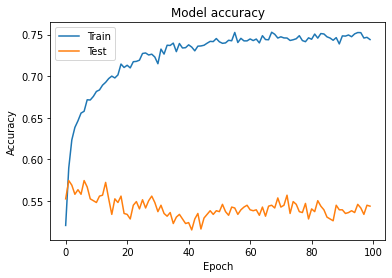

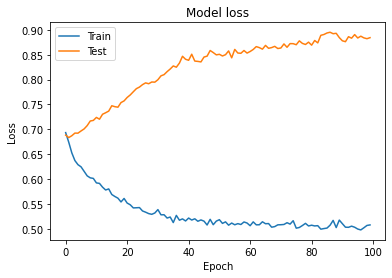

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [45]:
bluenames = ["Ahri", "Graves", "Yasuo", "Rumble", "Tristana"]
rednames = ["Veigar", "Qiyana", "Twisted Fate", "Amumu", "Blitzcrank"]

blueteam = [cass.Champion(name=x, region="NA").id for x in bluenames]
redteam = [cass.Champion(name=x, region="NA").id for x in rednames]


custx, custy = [], []

tmp = []
for c in blueteam:
    tmp.append(tf.keras.utils.to_categorical(keyid[c], num_classes=149))
    
for c in redteam:
    tmp.append(tf.keras.utils.to_categorical(keyid[c], num_classes=149))
    
custx.append(tmp)

custy = model.predict(np.array(custx))

print(np.argmax(custy))
print(custy)

1
[[0.10724777 0.89275223]]


In [41]:
cass.Champion(name="Cassioepia", region="NA").id

NotFoundError: No source returned a query result!